# Non-$\Lambda$CDM example

This is a example notebook to get the relevant 21cm Forest observables in non-standard cosmologies which present different large scale structure.

Here we show two different non-standard scenarios:

- Warm Dark Matter, which can suppress the abundance of low mass halos due to free-streaming, damping the 21 cm forest signal (see [arXiv:1403.1605](https://arxiv.org/abs/1403.1605)).

- Primordial Black Holes, which can enhance the number of small scale structures, and thus the number of absorbers, due to a shot noise isocurvature mode (see [arXiv:2104.10695](https://arxiv.org/abs/2104.10695)).

In [1]:
%matplotlib inline
from IPython.display import HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
mpl.rcParams.update({'font.size': 15})

from Source.forest import Forest
from Source.cosmo import Tk_ad
from Source.nlcdm import dndlnM_WDM, dndlnM_PBH

# Define the redshift of interest
z = 10

# Get the adiabatic temperature of the intergalactic medium at z
Tk = Tk_ad(z)

# Standard CDM cosmology (we don't use subhalo for this comparison)
forest_cdm = Forest(z, Tk, use_subhalos = False)

# Warm Dark Matter cosmology, where all dark matter particles have a mass of 10 keV
forest_wdm = Forest(z, Tk, use_subhalos = False, dndlnM = lambda M, z: dndlnM_WDM(M, z, mwdm = 10.))

# Primordial black holes cosmology, where 10 % of dark matter is composed by PBHs of 1 solar mass
forest_pbh = Forest(z, Tk, use_subhalos = False, dndlnM = lambda M, z: dndlnM_PBH(M, z, fpbh = 0.1, Mpbh = 1.))

Optical depth file for z=10 does not exist. Generating...


Generating optical depth file: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:04<00:00, 13.32it/s]
/Users/omena/Downloads/ForestSubhalos/HAYASHI/hayashi_main/Source/forest.py:90: RuntimeWarning: invalid value encountered in true_divide
  self.boost_factor_arr = np.where(self.tau_host_arr==0., 0., self.tau_sub_arr/self.tau_host_arr)


## Number of absorbers

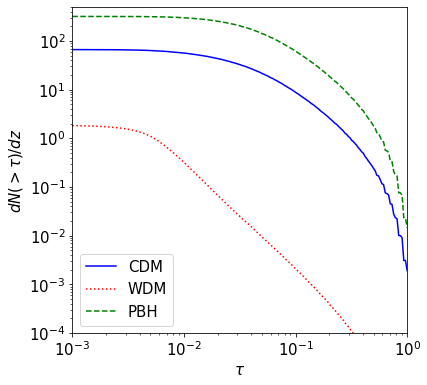

In [2]:
fig, (ax) = plt.subplots(1,1,sharex=True,figsize=(6,6))

cumulvec_cdm, _ = forest_cdm.num_absorbers()
cumulvec_wdm, _ = forest_wdm.num_absorbers()
cumulvec_pbh, _ = forest_pbh.num_absorbers()

ax.plot( forest_cdm.tauvec, cumulvec_cdm, linestyle="-", color="b", label="CDM" )
ax.plot( forest_wdm.tauvec, cumulvec_wdm, linestyle=":", color="r", label="WDM" )
ax.plot( forest_pbh.tauvec, cumulvec_pbh, linestyle="--", color="g", label="PBH" )

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$\tau$")
ax.set_ylabel(r"$dN(>\tau)/dz$")

ax.legend()

ax.set_ylim(1.e-4, 5.e2)
ax.set_xlim(forest_cdm.tauvec[0], forest_cdm.tauvec[-1])
fig.savefig("Plots/cumul_nlcdm.pdf", bbox_inches='tight')